In [1]:
import sys
import os
import os.path as osp
import matplotlib.pyplot as plt

sys.path.append("../..")
from src.data_utils.droplets_image_extractor import *
from src.utility import *


%matplotlib inline

In [50]:
path_ds = "../../datasets/"
path_ds_train = osp.join(path_ds, "droplets", "train", "original")
path_ds_test = osp.join(path_ds, "droplets", "test", "original")
path_op_train_img = osp.join(path_ds, "droplets", "detector_ds", "images", "train")
path_op_test_img = osp.join(path_ds, "droplets", "detector_ds", "images", "test")
path_op_train_lbl = osp.join(path_ds, "droplets", "detector_ds", "labels", "train")
path_op_test_lbl = osp.join(path_ds, "droplets", "detector_ds", "labels", "test")

In [51]:
list_train_imgs = os.listdir(path_ds_train)

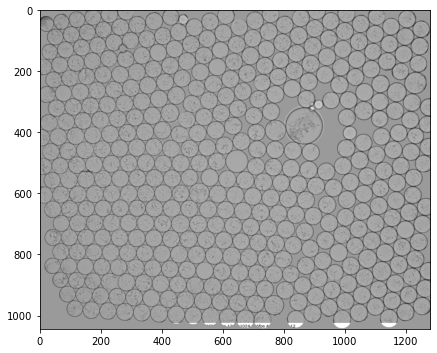

In [78]:
# Create mask for image
image_name = list_train_imgs[29]
image_path = os.path.join(path_ds_train, image_name)
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = get_hough_circles(gray)

mask = np.zeros_like(gray, np.uint8)

for (x, y, r) in circles:
    cv2.circle(mask, (x, y), int(r * 1.1), (255, 255, 255), -1)

xs, ys = np.where(mask == 255)

final_img = np.full_like(gray, np.mean(gray), np.uint8)
final_img[xs, ys] = gray[xs, ys] 
plt.figure(figsize=(7,7))
plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

In [81]:
# Save image
cv2.imwrite(osp.join(path_op_train_img, image_name), final_img)

'bacteria-phage05-3h20E0000000000.jpg'

In [95]:
# Save labels
lines = circles.copy()
lines = np.hstack((lines, lines[:,-1][:, None])).astype(float)
lines[:, [0, 2]] /= final_img.shape[1]
lines[:, [1, 3]] /= final_img.shape[0]
lines = lines.tolist()

with open(osp.join(path_op_train_lbl, image_name[:-3]+"txt"), 'w') as f:
    for l in lines:
        line = f"0 {l[0]} {l[1]} {l[2]} {l[3]} \n"
        f.write(line)